#Content
- Intro to Statsmodel
- Assumption of Linear Regression
  - Assumption of Linearity
  - Features are not multi-Collinear
   - Collinearity
   - Multi-Collinearity
   - [Performance with Multicollinearity](https://www.scaler.com/hire/test/problem/24134/)
   - [VIF](https://www.scaler.com/hire/test/problem/24314/)
   - [Multicollinearity and VIF](https://www.scaler.com/hire/test/problem/24316/)
   - [Features of Linear Regression](https://www.scaler.com/hire/test/problem/16166/)
  - Errors are normally Distributed
    - [Interpreting Outliers](https://www.scaler.com/hire/test/problem/24135/)
  - Heteroskedasticity should not exist
    - [Residual Interpretation](https://www.scaler.com/hire/test/problem/16183/)
    - [Heteroskedasticity](https://www.scaler.com/hire/test/problem/18068/)
    - [Increasing residuals](https://www.scaler.com/hire/test/problem/33190/)
  - No Autocorrelation


## Intro to statsmodel

Let's check a library called `statsmodel` which we will be using throughout this lecture.

First we will download our data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 25.6MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

selling_price      year  km_driven   mileage    engine  max_power  \
0      -1.111046 -0.801317   1.195828  0.045745 -1.310754  -1.157780   
1      -0.223944  0.450030  -0.737872 -0.140402 -0.537456  -0.360203   
2      -0.915058 -1.426990   0.035608 -0.582501 -0.537456  -0.404885   
3      -0.892365 -0.801317  -0.409143  0.329620 -0.921213  -0.693085   
4      -0.182683  0.137194  -0.544502  0.760085  0.042999   0.010435   

        age      make     model  Individual  Trustmark Dealer    Diesel  \
0  0.801317 -0.433854 -1.125683    1.248892         -0.098382 -0.985275   
1 -0.450030 -0.327501 -0.333227    1.248892         -0.098382 -0.985275   
2  1.426990 -0.327501 -0.789807    1.248892         -0.098382 -0.985275   
3  0.801317 -0.433854 -0.905265    1.248892         -0.098382 -0.985275   
4 -0.137194 -0.246579 -0.013096   -0.800710         -0.098382  1.014945   

   Electric       LPG    Petrol    Manual         5        >5  
0 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
1 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
2 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
3 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
4 -0.020095 -0.056917 -0.975970  0.495818  0.444503 -0.424728

In [ ]:
y=df[['selling_price']]
X=df.drop('selling_price', axis=1)

Now, let's train our model on the data.

In [ ]:
model = sm.OLS(y, X)
results = model.fit()

X_sm = sm.add_constant(X)  # Statmodels default is without intercept, to add intercept we need to add constant.

# Print the summary statistics of the model
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          2.017e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):                        0.00
Time:                        06:08:12   Log-Likelihood:                          125.84
No. Observations:               19820   AIC:                                     -219.7
Df Residuals:                   19804   BIC:                                     -93.37
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Let's look at few of the variables in this table:

- Dep. Variable: This column displays the name of the dependent variable being predicted in the regression.

- Model: It provides a concise representation of the model type and method used, such as "OLS" (Ordinary Least Squares).

- R-squared: Represents the coefficient of determination (R-squared) value.

- Adj. R-squared: This is the adjusted R-squared value, which accounts for the number of predictors in the model and adjusts the R-squared accordingly.

**Quiz** (Check your understanding)

```
Q: How do you interpret an R2 score of 0.75?
a) 75% of the dependent variable can be explained by the independent variables.
b) The model's predictions are 75% accurate.
c) There is a weak relationship between the predictor and response variables.
d) The model's predictions have an average deviation of 0.75.

A: a) 75% of the dependent variable can be explained by the independent variables.
```

**Quiz** (Check your understanding)
```
Q: What does a higher adjusted R² value indicate?
a) A stronger linear relationship between predictor and response variables.
b) A better fit of the model to the training data.
c) A higher percentage of variation explained by the predictor variables.
d) A lower risk of multicollinearity among the predictors.

A: b) A better fit of the model to the training data.
```

#### So how is this different from sklearns' linear regression?

\
1.Implementation:
- OLS refers to a method for estimating the parameters of a linear regression model, specifically by minimizing the sum of squared residuals.
- On the other hand, sklearn linear regression provides a pre-implemented linear regression model, including the OLS estimation method.

\
2.Additional Features:
- While OLS focuses solely on estimating the parameters of a linear regression model, sklearn's linear regression offers additional features and functionality.
- It provides a more comprehensive toolkit for regression analysis, including options for feature scaling, regularization techniques (such as Ridge & Lasso regression), cross-validation, and model evaluation metrics.



We will see more uses of statsmodel library as we continue with today's lecture.


## Assumptions of Linear Regression

- We can arrive at concept of Linear regression in two ways.
  - Algebra & Optimization (Geometric) - We covered this
  - Probability & Statistics
- We can prove that Linear regression is a very good model if all the statistical assumptions holds true.


## 1.Assumption of Linearity



<!-- - There exists a linear function of d-dim s.t `y_i = f_linear(xi)`.
- There is a linear relationship or linear function such that if we give a point xi to it, it can predict yi. -->

The assumption of linearity in linear regression can be summarized as follows:

1. **Linear Relationship:**
  - There should be a linear relationship between the independent variables (inputs) and the dependent variable (output).
  - The change in the dependent variable should be directly proportional to the change in the independent variables.

2. **Straight Line Fit:**
  - The relationship should be best represented by a straight line.
  - The linear regression model assumes that the relationship between the variables can be expressed using a linear equation, where the coefficients represent the slope of the line.


**Quiz** (Check your understnding)
```
What does it mean if the residuals versus predicted values plot shows a nonlinear pattern?
a) The assumption of linearity is violated.
b) The model has perfect prediction accuracy.
c) The residuals are normally distributed.
d) The model suffers from multicollinearity.

A: a) The assumption of linearity is violated.
```

## 2. Non multi-collinear features


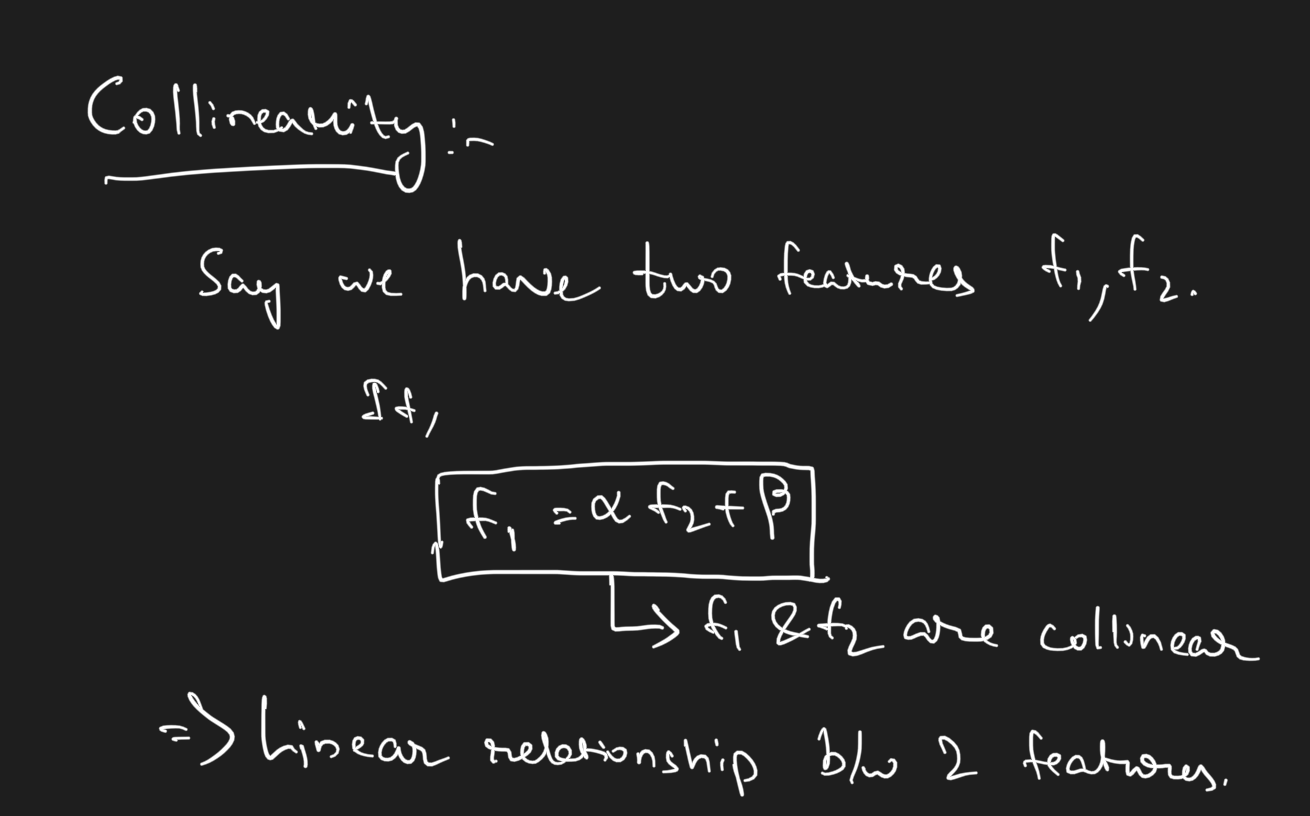

#### What is collinearity?

- Say we have two features f1 and f2
- If f1 can be represented in terms of f2 in a linear way, i.e., $f_1=αf_2+β$
  - f1 and f2 are collinear

#### So then, what is multi collinearity?

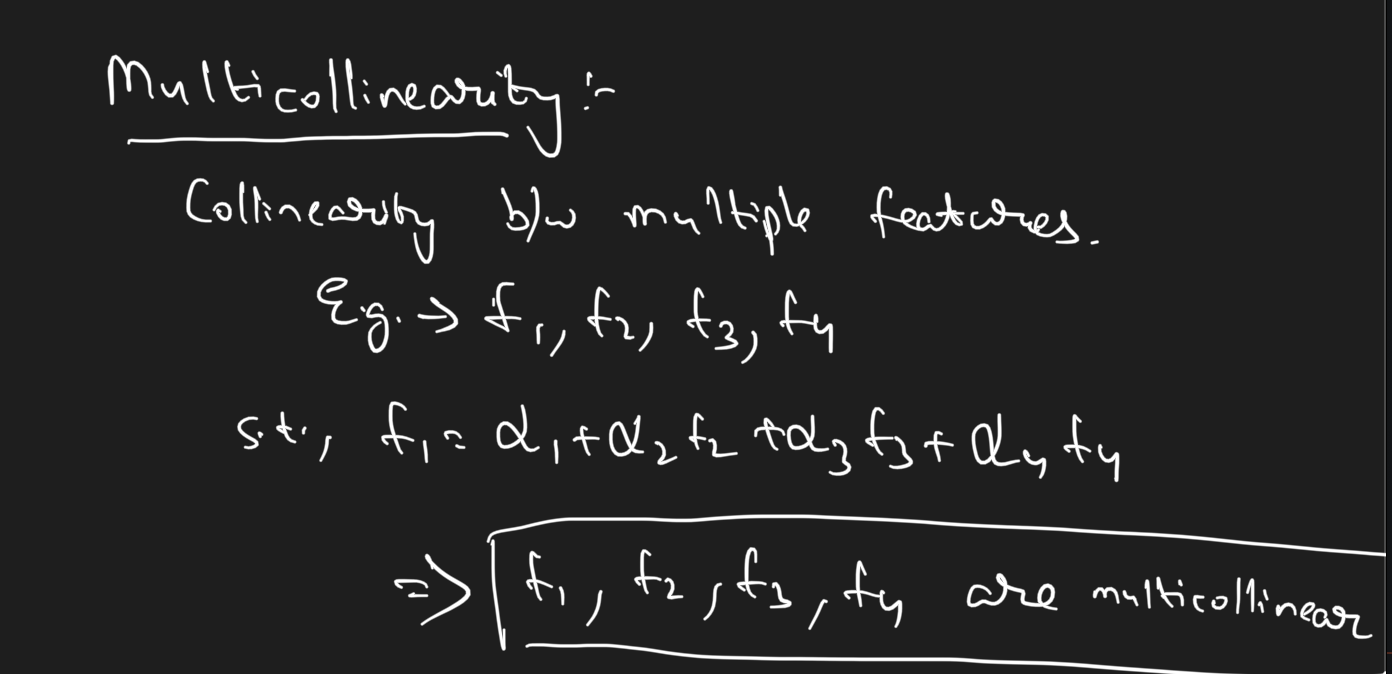

- Multicollinearity can be said as collinearity across multiple features
- Say we have 4 features f1, f2, f3 and f4
  - $f_1 = α_1+α_2f_2+α_3f_3+α_4f_4$

  => f1, f2, f3, f4 are said to be multicolinear


#### Why is multi-collinearity a problem?

Let's take an example and see

Say we found the optimal weights w* for a model with 3 features

w*=[1,2,3] (corresponding to w1, w2, w3) and w0 = 5

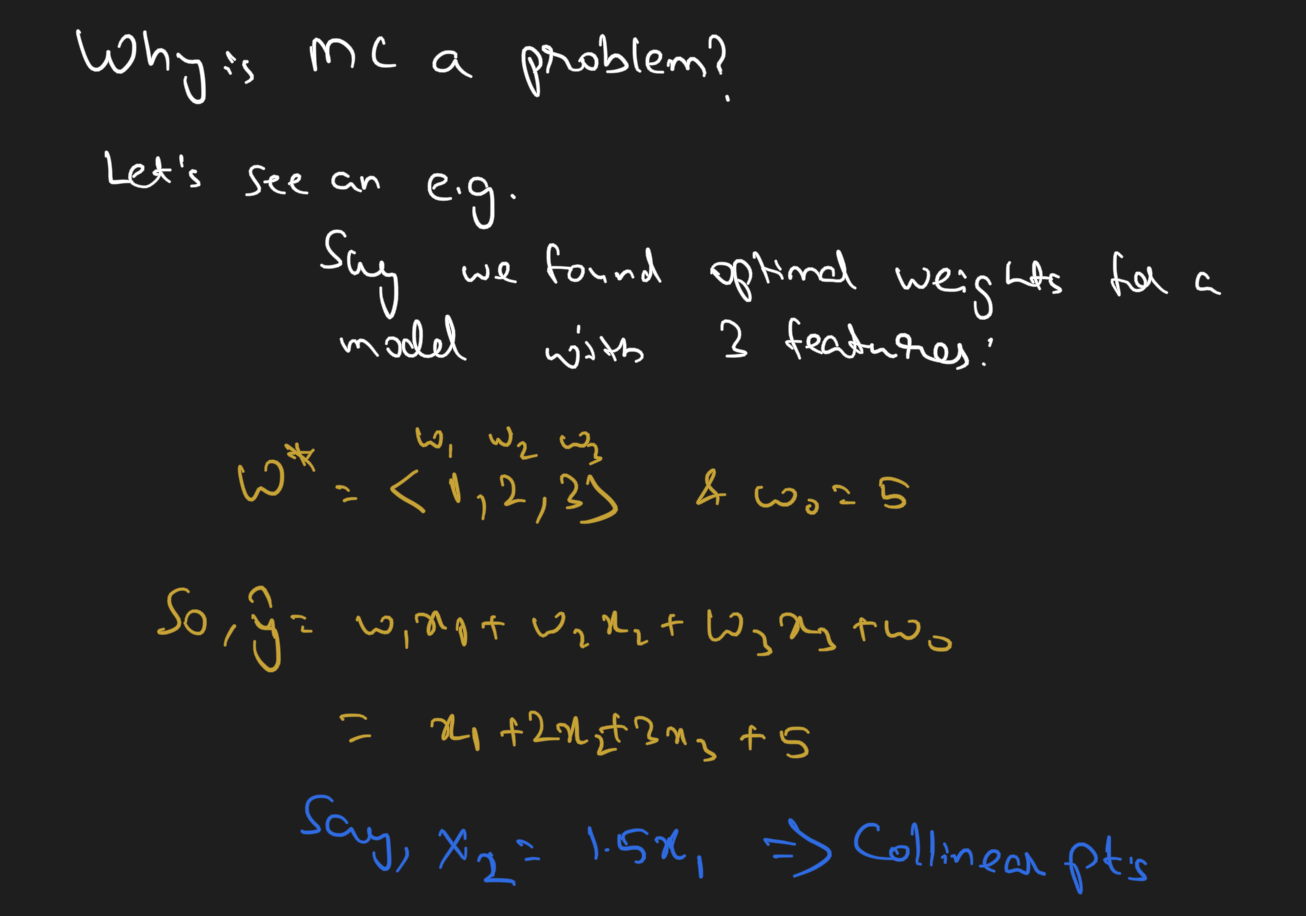

So, $\hat{y}=w_1x_1+w_2x_2+w_3x_3+w_0$ \
= $x_1+2x_2+3x_3+5$

Now, let's say x1 and x2 are collinear, and x2=1.5x1

$\hat{y}$ now becomes $4x_1+3x_3+5$

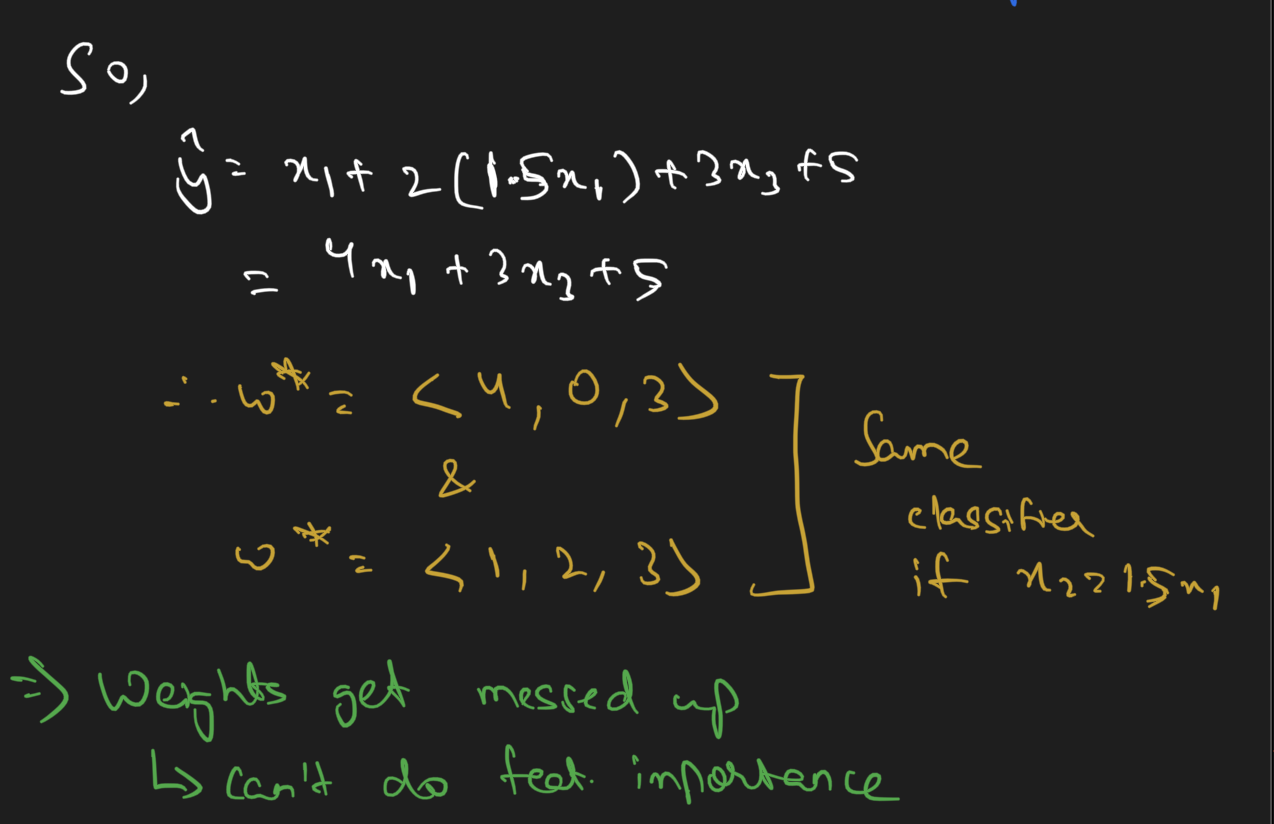

So w* can be written as [4,0,3]

Notice, both w*=[4,0,3] and [1,2,3] will point to the same classifier

This would mess up the weights and we won't be able to do feature importance.

Hence, multicollinearity is not good for our model

**Quiz** (What do you think?)
```
Which of these isn't collinear?
A. f1=log(f2)
B. f1=(alpha^2+beta) f2
C. f1=5f2

Ans: A
```

**Quiz** (Check your understanding)

```
Q: How does multicollinearity affect regression analysis?
a) It reduces the interpretability of regression coefficients.
b) It increases the accuracy of the regression model.
c) It improves the goodness-of-fit of the regression model.
d) It has no impact on the regression analysis.

Ans: a) It reduces the interpretability of regression coefficients.
```

Now that we understand Multi-Colinearity and its issues

#### How can we remove these highly correlated features?

We will use something called VIF (Variance Inflation Factor)

Let's understand this with an example


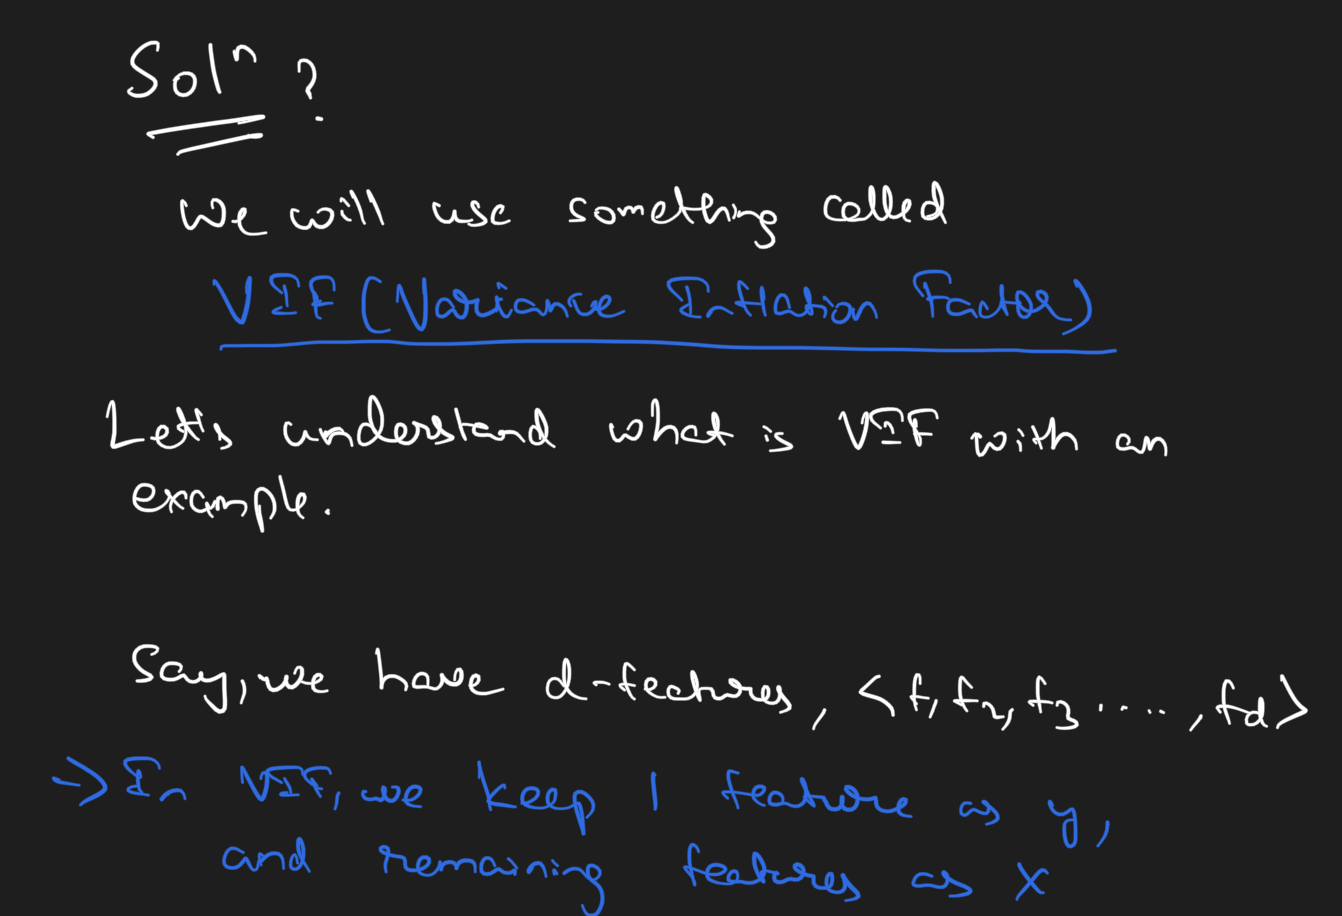

Say, we have d-features [f1, f2, f3,....fd]

**Step 1:
In VIF, we keep 1 feature as y, and remaining features as X**

Let's take f2 as our y.
- [f1, f3, f4....fd] becomes x



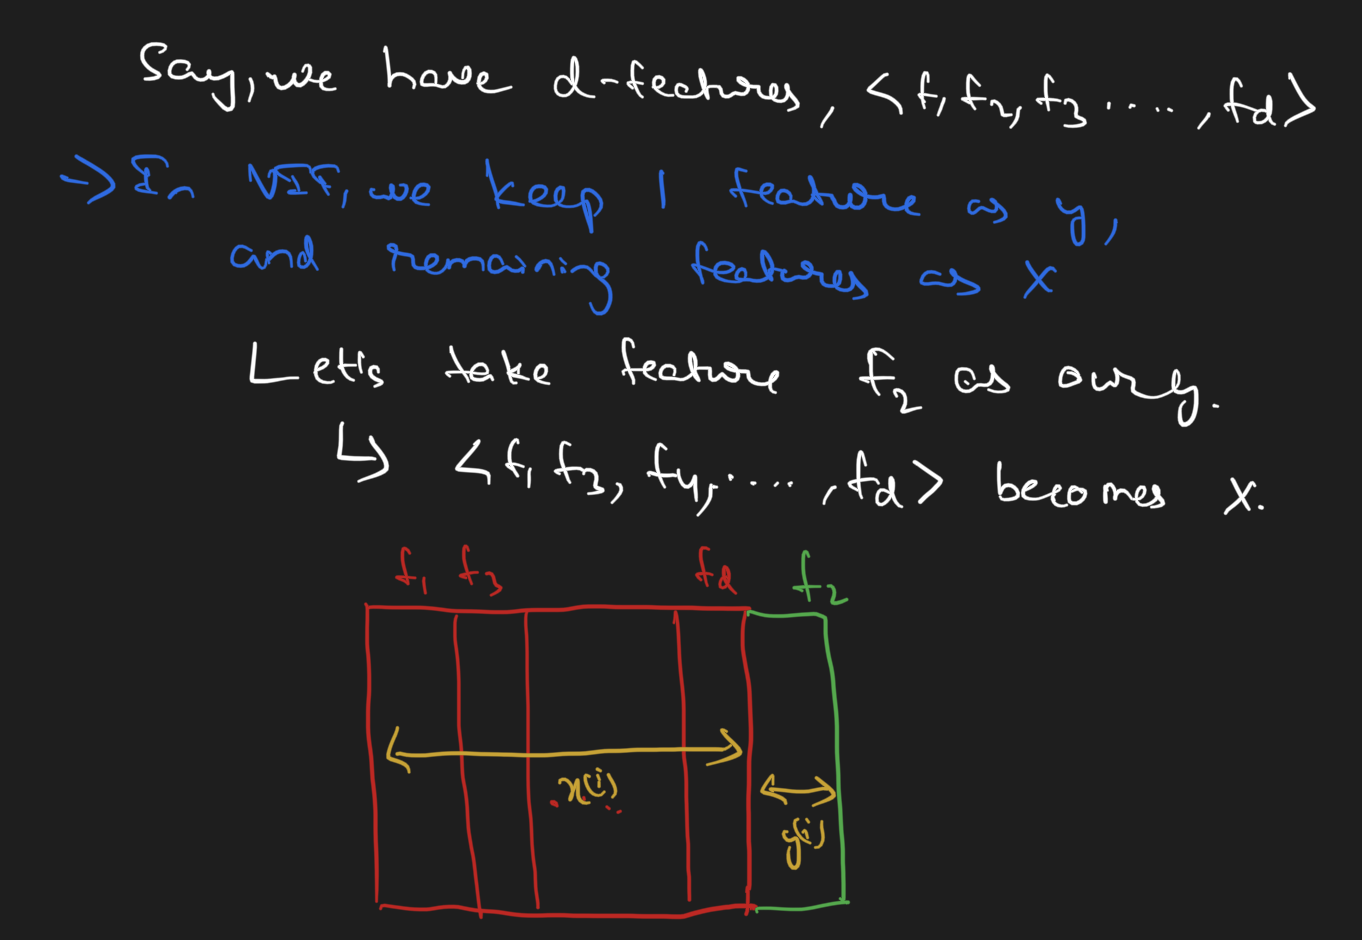

**Step 2: Now we train a linear regression model on this x and y (predicting f2 in this case)**

**Step 3: Once trained, find R-squared metric of this model**

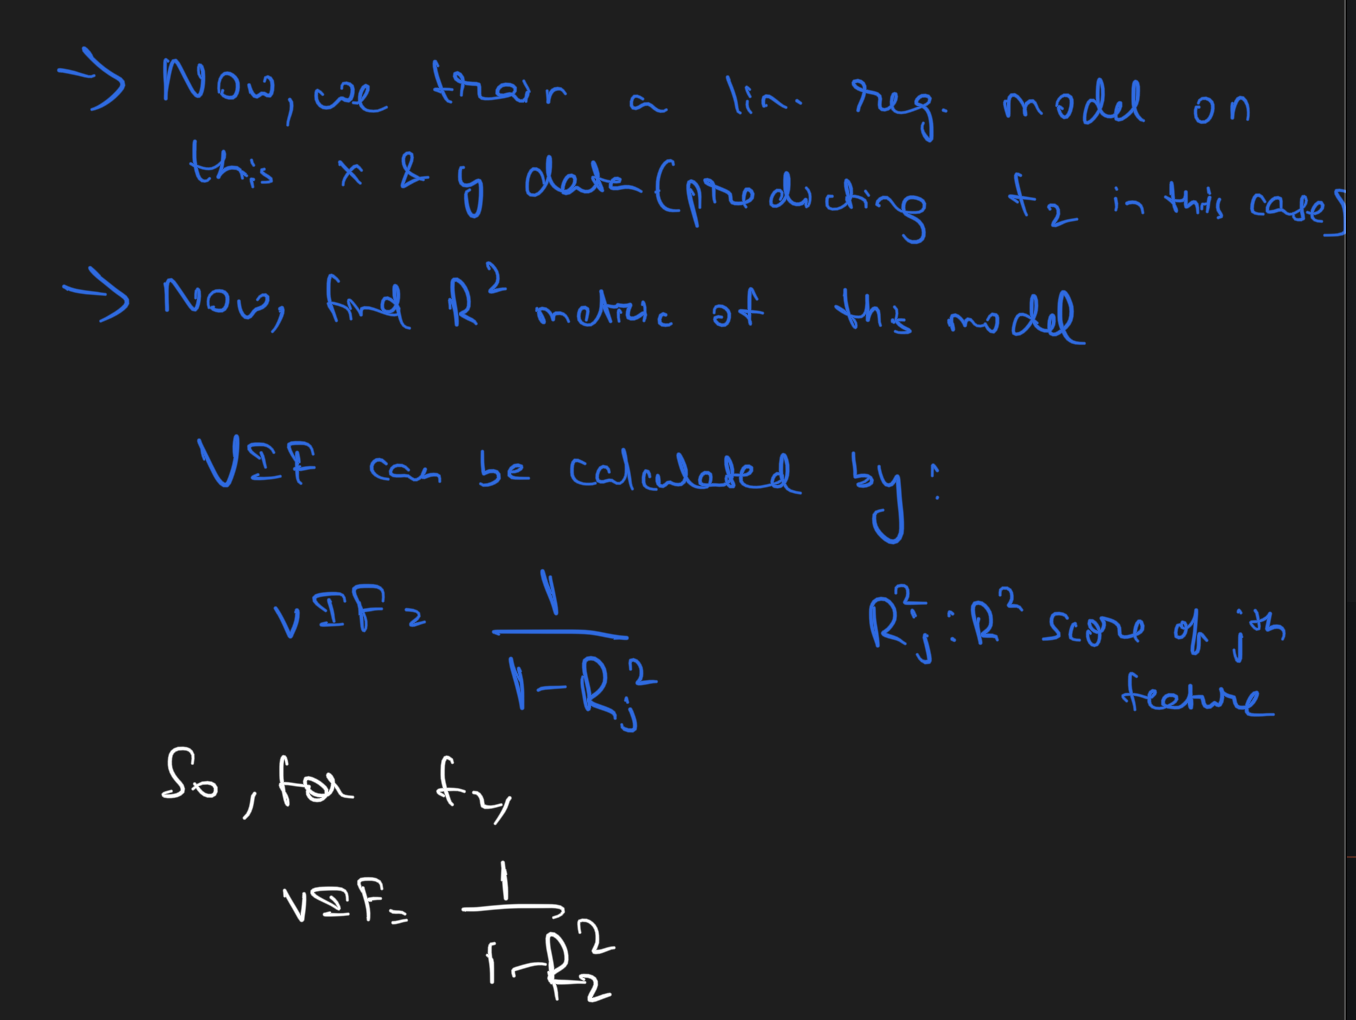

VIF can be calculated by:

VIF = $\frac{1}{1-{R_j}^2}$, where ${R_j}^2$ : R-squared score of jth feature

So, for f2,
VIF = $\frac{1}{1-{R_2}^2}$

Based on this, let's look at multiple cases of R2 and VIF values:

**Case 1**:R2 almost equal to 1
-> VIF = $∞$ = very high
- This implies the feature is highly collinear
- Should be removed

Note: High R2 means f2 has a linear relation with other features, which is collinearity


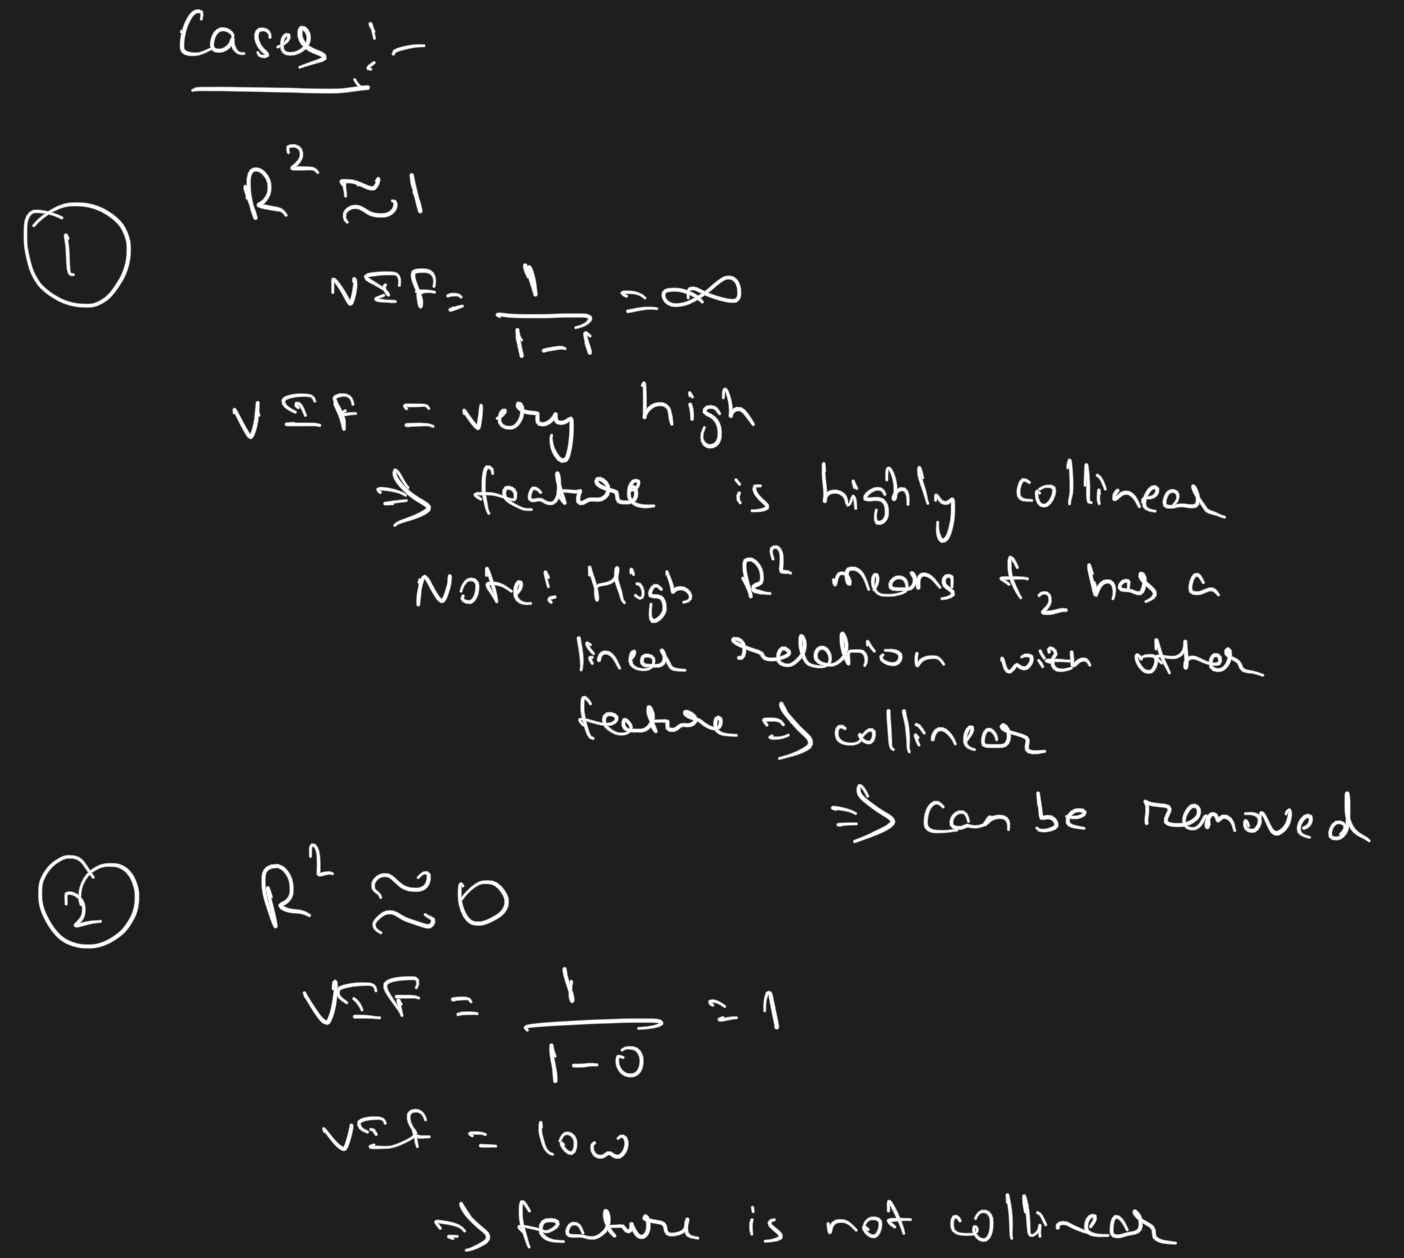

**Case 2**:R2 almost 0
-> VIF=1 -> low
- This implines the feature is not collinear

**Quiz** (What do you think?)

```
Q: What does a VIF value greater than 1 indicate?
a) Strong multicollinearity between the predictor variable and other variables.
b) A perfect linear relationship between the predictor variable and the dependent variable.
c) A significant influence of the predictor variable on the outcome variable.
d) A negligible impact of the predictor variable on the regression model.

A: a) Strong multicollinearity between the predictor variable and other variables.
```

#### So what would be a high/low multicollinear feature based on VIF value?

A rule of thumb we can follow:
- VIF > 10: Very high multicollinearity, drop
- 5<=VIF<=10: High multicollinearity
- VIF<5: Low multicollinearity

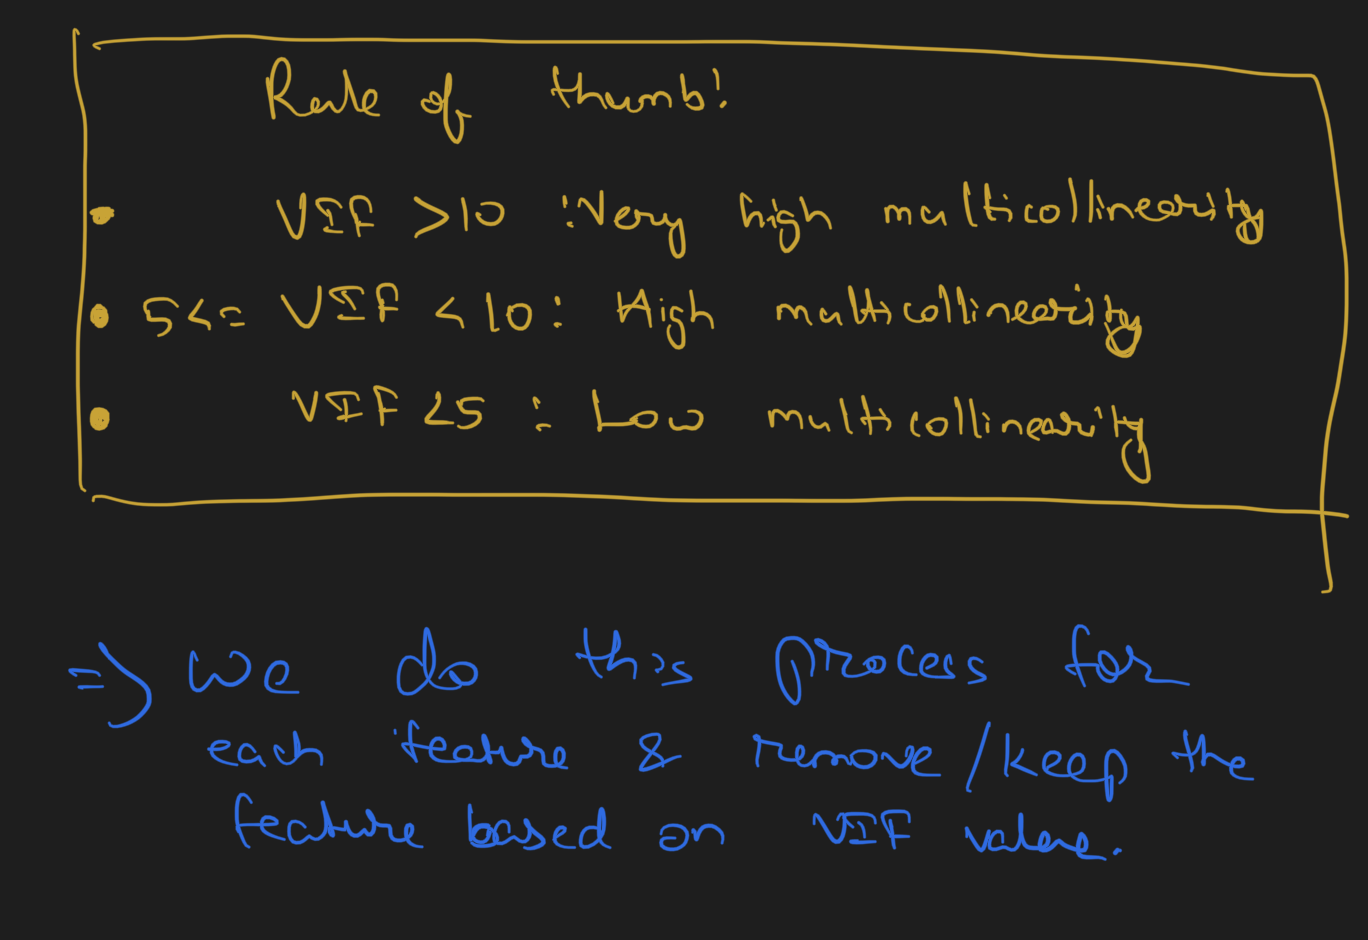

We do this process for each feature, calculate their VIF values and check multicollinearity, and based on that, keep.remove the features

**Quiz**

```
A clothing store wants to predict sales based on factors like price, promotions, and store location.
Which assumption of linear regression is important for accurate sales predictions?
A) Linearity between the independent variables and sales.
B) Normal distribution of sales.
C) MultiCollinearity among features
D) All of them
```

**Correct Answer:** A) Linearity between the independent variables and sales.


**Explanation:** The assumption of linearity assumes that there is a linear relationship between the independent variables (price, promotions, store location) and sales, thus ensuring that the model captures the true relationship and enables accurate sales predictions.

Now lets see if there are any multi-collinear features in Cars24 data

we will be using Statsmodel for Linear Regression

For standardization of X we will be using Scikit Learn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Which does the implementation of Standardizing features for us

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
df = pd.read_csv('cars24-car-price-clean.csv')

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 104MB/s]


In [ ]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm

X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]

X_sm = sm.add_constant(X)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(Y, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.017e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:08:13   Log-Likelihood:                 125.37
No. Observations:               19820   AIC:                            -216.7
Df Residuals:                   19803   BIC:                            -82.53
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.689e-17      0.002  

####Multicollinearity
- When one or more input variables exhibhit strong correlation
- One variable is enough to be part of the model.

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features    VIF
0               year    inf
5                age    inf
13            Petrol  17.95
10            Diesel  17.03
16                >5  13.32
15                 5  12.08
3             engine   6.27
7              model   5.80
4          max_power   5.08
6               make   3.20
2            mileage   3.15
14            Manual   1.80
12               LPG   1.24
1          km_driven   1.23
11          Electric   1.17
8         Individual   1.09
9   Trustmark Dealer   1.02

#### Note : VIF values tends to be infinity when there is a perfect correlation between the variables

Removing the variable with highest VIF

In [ ]:
cols2 = vif["Features"][1:].values
X2 = X[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(Y, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.017e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:08:14   Log-Likelihood:                 125.84
No. Observations:               19820   AIC:                            -217.7
Df Residuals:                   19803   BIC:                            -83.48
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.689e-17      0.002  

Lets try removing one more variable

In [ ]:
vif = pd.DataFrame()
X_t = X[cols2]
vif['Features'] = cols2
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

cols2 = vif["Features"][1:].values
X2 = X[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(Y, X2_sm).fit()
print(sm_model.summary())

            Features    VIF
1             Petrol  17.95
2             Diesel  17.03
3                 >5  13.32
4                  5  12.08
5             engine   6.27
6              model   5.80
7          max_power   5.08
8               make   3.20
9            mileage   3.15
0                age   1.92
10            Manual   1.80
11               LPG   1.24
12         km_driven   1.23
13          Electric   1.17
14        Individual   1.09
15  Trustmark Dealer   1.02
                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.151e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:08:15   Log-Likelihood:                 120.97
No. Observations:               19820   AIC:      

## 3. Errors are normally distributed

The **assumption of multivariate normality** in linear regression states:

- The residuals or errors of the regression model follow a multivariate normal distribution.
- In other words, the errors should be jointly normally distributed across all levels of the independent variables.
- They should be symmetric and bell-shaped when plotted against their predicted values.

We take the assumption that every linear model has some error attached to it.

We take it as epsilon $ϵ$

- $y^{(i)}=w_0+w^Tx^{(i)} + ϵ$

=> $y^{(i)}-\hat{y}^{(i)}=ϵ$

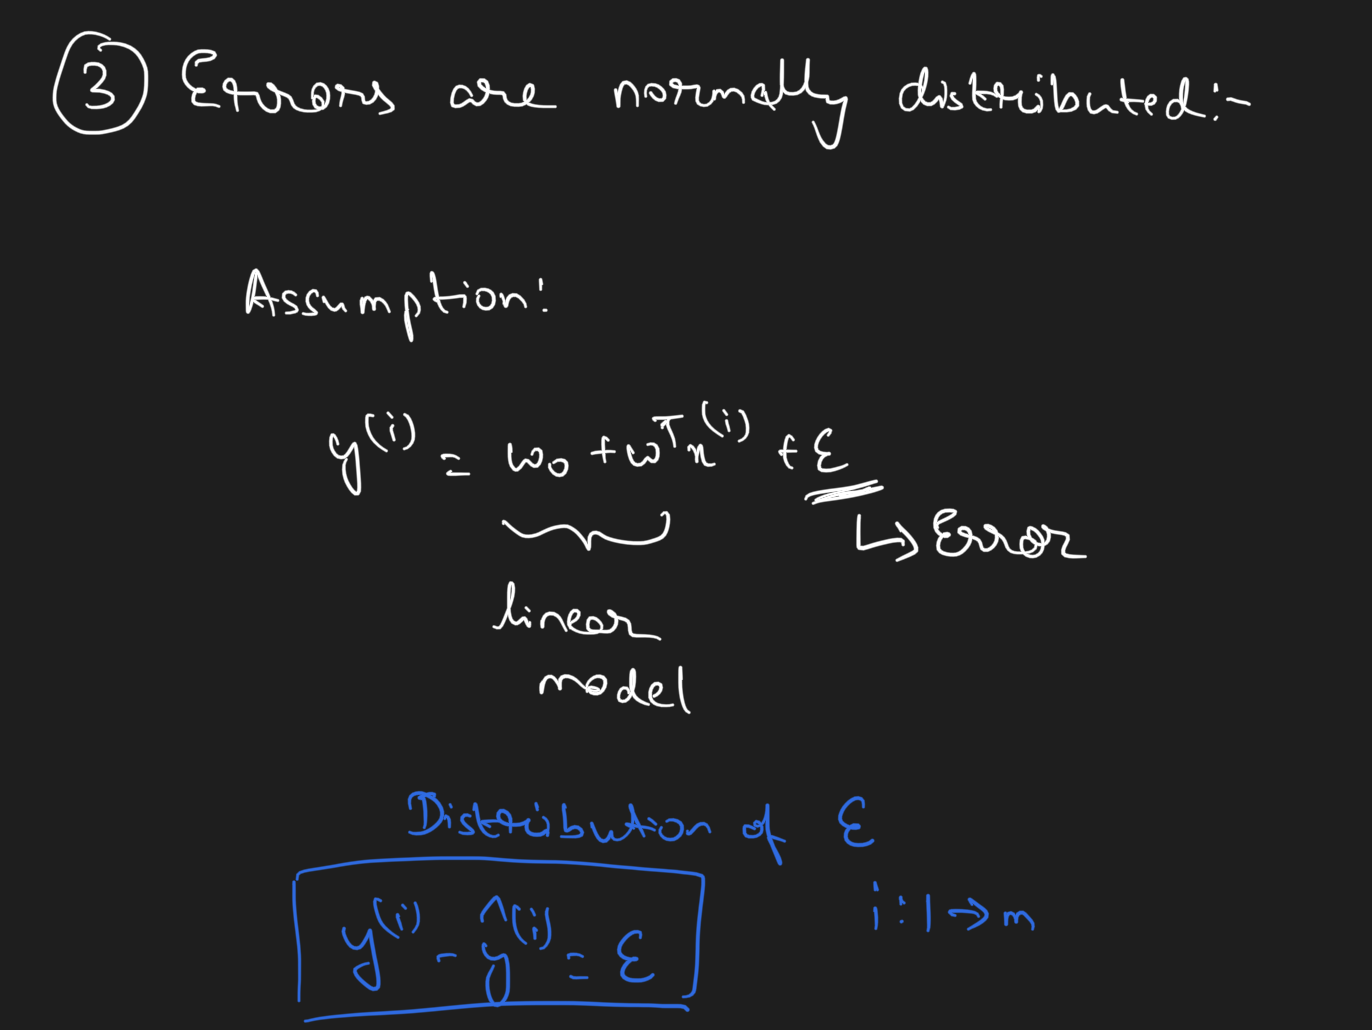

If we plot the distribution of $ϵ$, we should ideally get a normally distributed bell-shaped curve

On the other hand, we are getting a skewed plot, then that means error is large at certain points, indicating the presence of outliers.

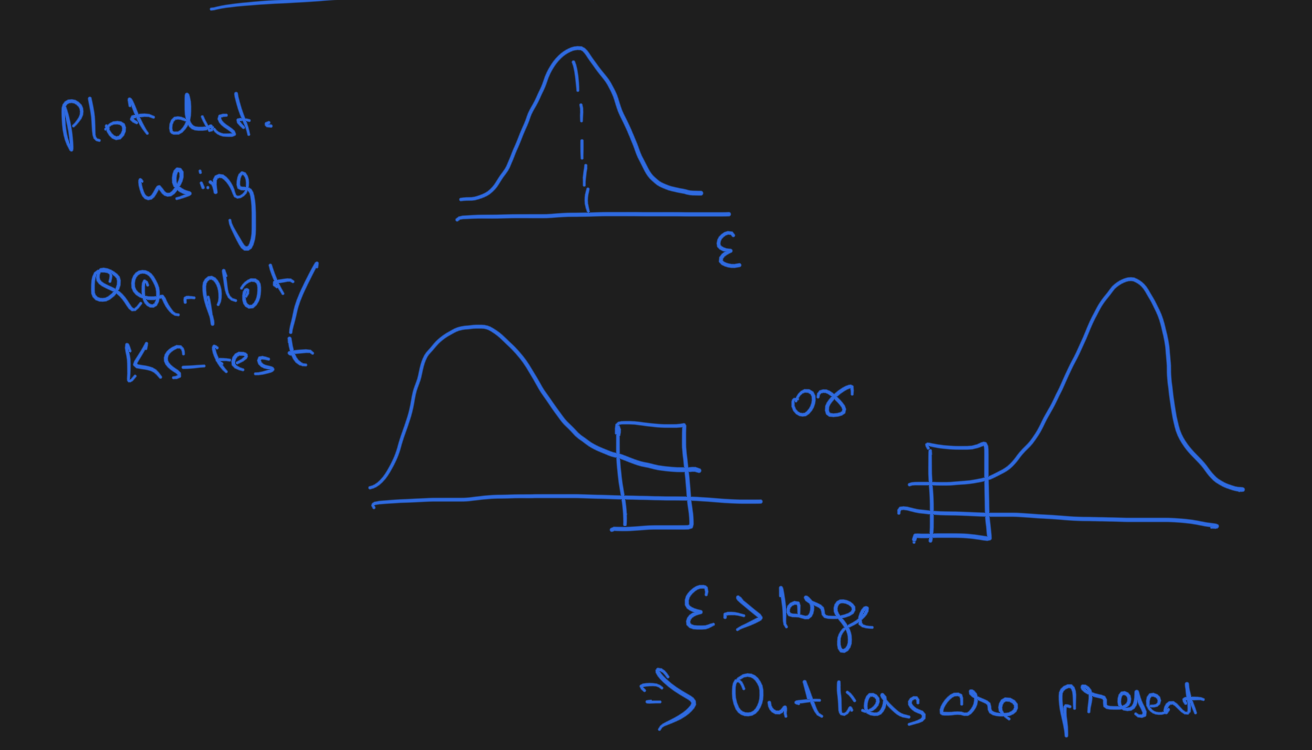

#### How do outliers impact linear regression?

Let's take a 2D e.g. of predicting the price from the given model.


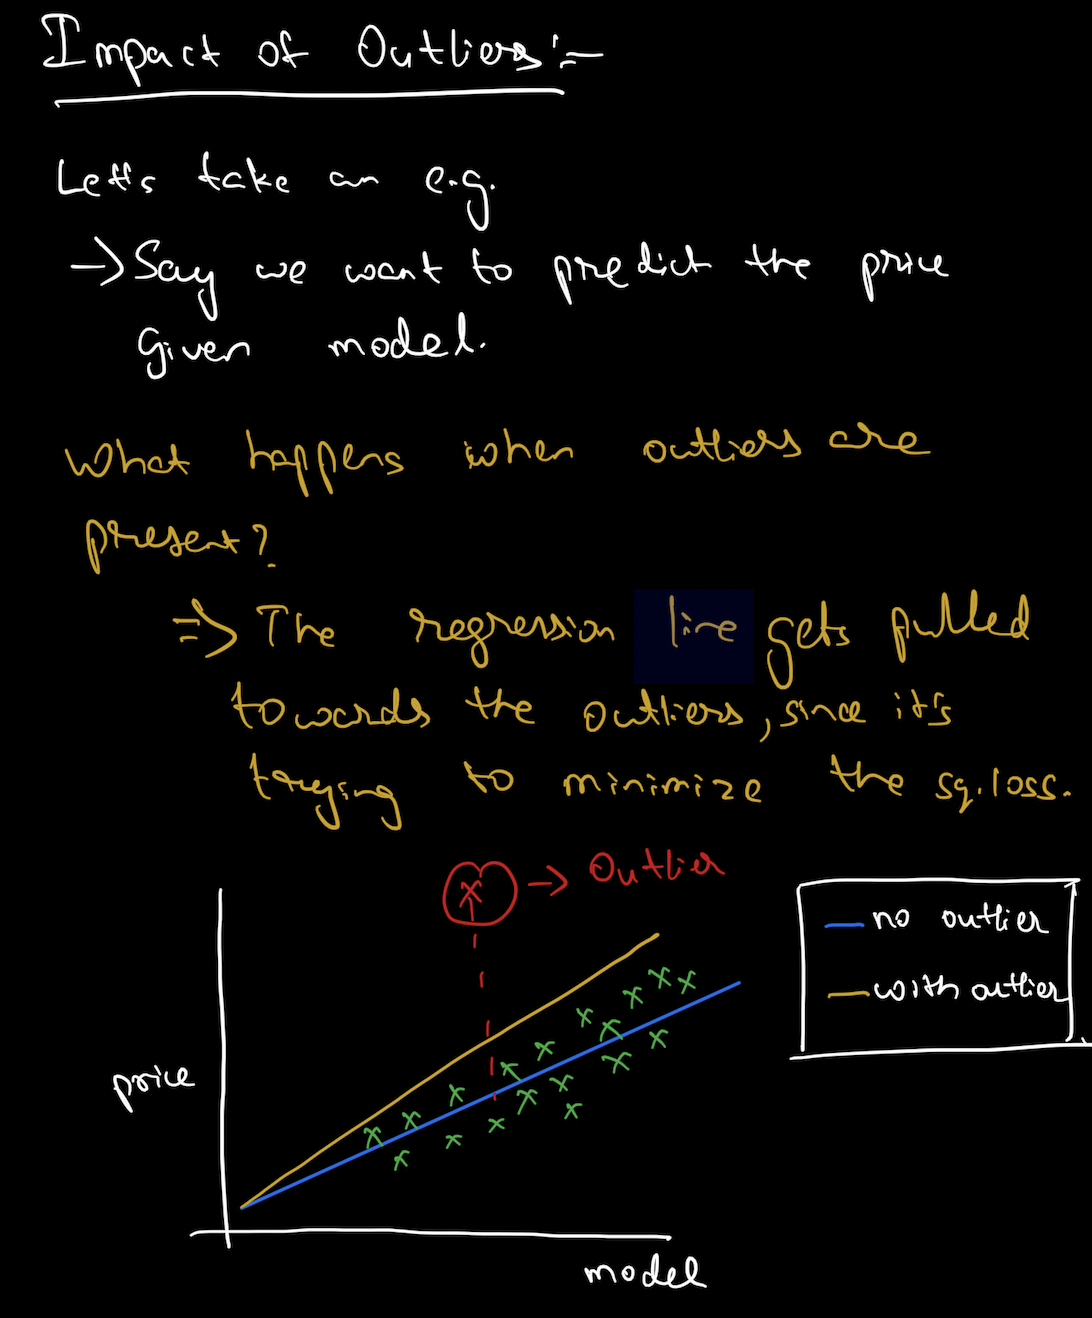

#### What happens when outliers are preseent?

The regression line gets pulled towards the outliers, since it's trying to minimize the sq. loss.

Hence we get a line shifted towards the outlier point

#### Question: After plotting the plot for errors, we see the curve is non-gaussian i.e. Outliers are present. How do we identify and remove these outlier?

Ans:

- Outliers will have large error value (yi - yi_hat).
- Remove the points will high error as many as you want and fit the model again.
- Check the distribtion of errors on new model and repeat.

Lets See how is the error distribution for Car24

In [ ]:
Y_hat = sm_model.predict(X2_sm)
errors = Y_hat - Y

Text(0.5, 1.0, 'Histogram of residuals')

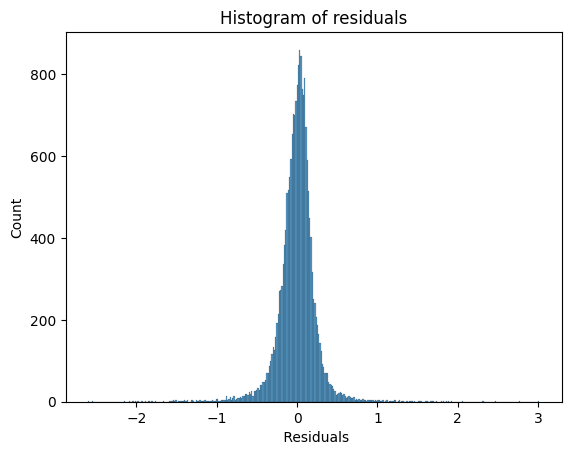

In [ ]:
import seaborn as sns

sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")


- Recall, We plot the distribution the errors.
  - If the distribution of errors is gaussian distribution then the assumption of error being normally distributed is being sastified (sanity check)



**Quiz:**
```
While building a risk prediction model for loan defaulters, it was observed that the erros were right skewed.
Does this imply anyway that the linear regression model is inaccurate?


A) Yes, since the features are multi-collinear
B) Yes, since the errors aren’t normaly distributed
C) Yes, by violation of assumption of linearity
D) No, the model may be accurate.

```
**Correct Answer:** B) Yes, since the errors aren’t normaly distributed


# 4.Heteroskedasticity should not exist

Let's take our earlier example of model and price.

When we plot the two features along with the regression line, notice
- The errors are increasing as we go from left to right

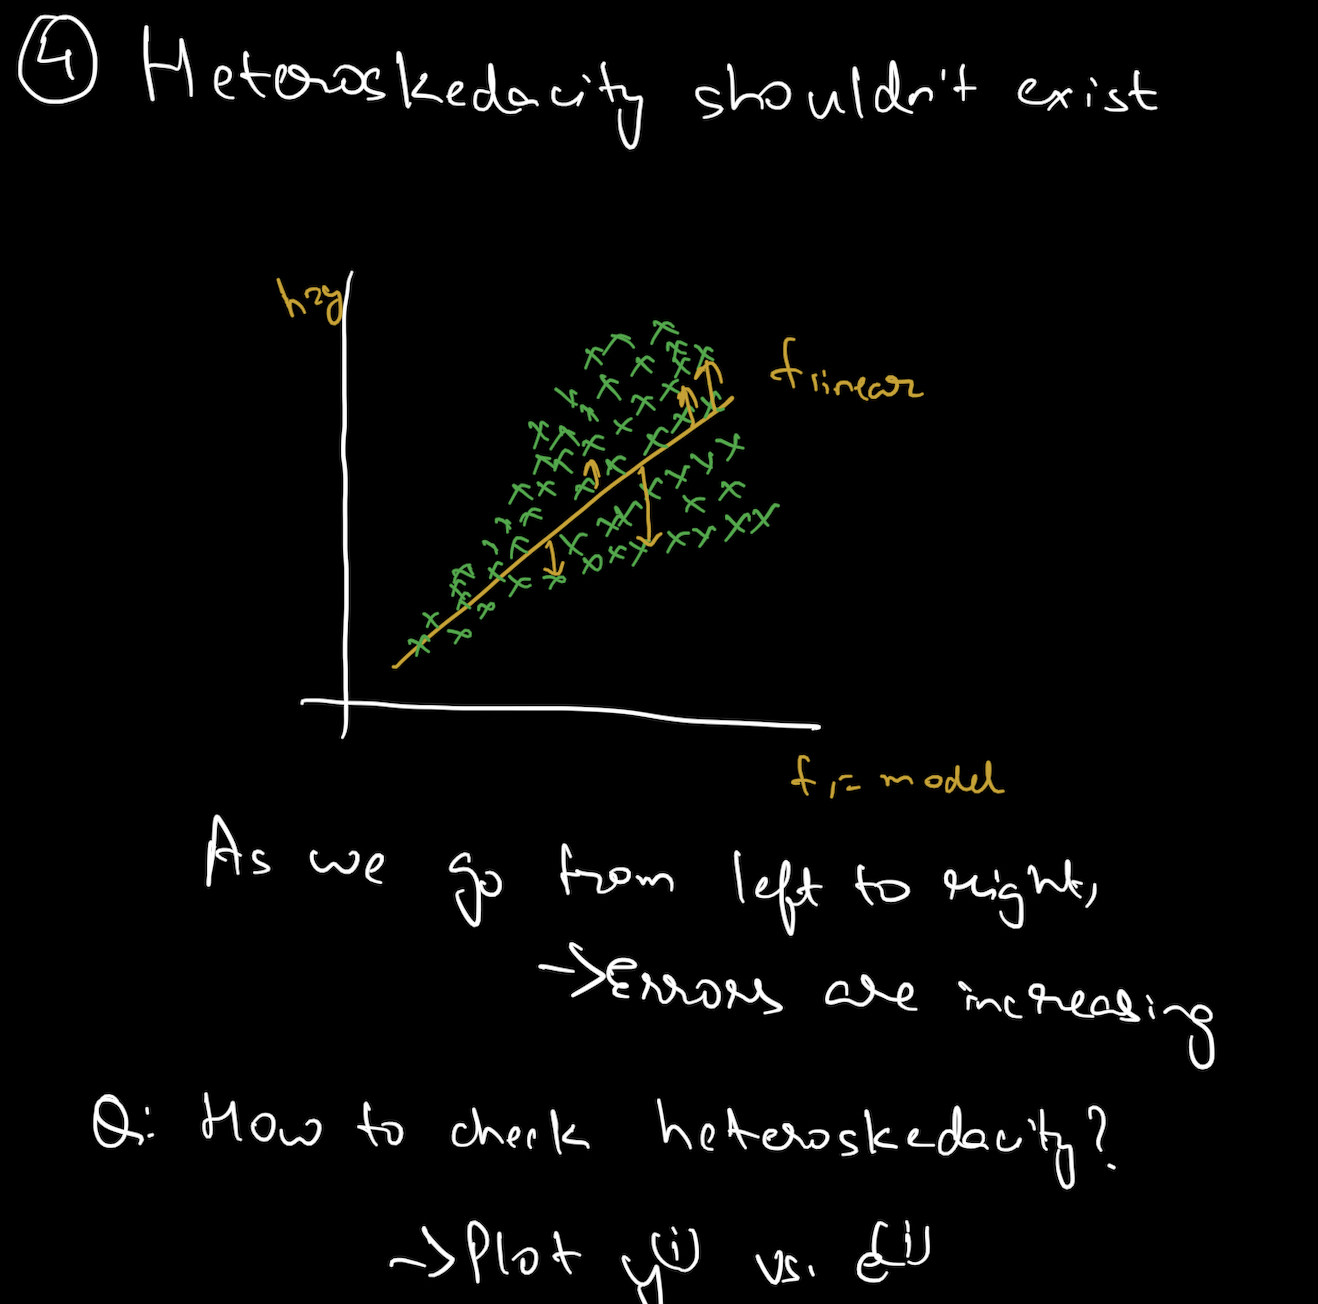

**How to check heteroskedasticity?**

- Plot $y^{(i)} \ vs \ e^{(i)}$

In maths/stats proof of linear regression, we assume the errors are normally distributed, i.e., mean=0 and Std. Dev. is constant

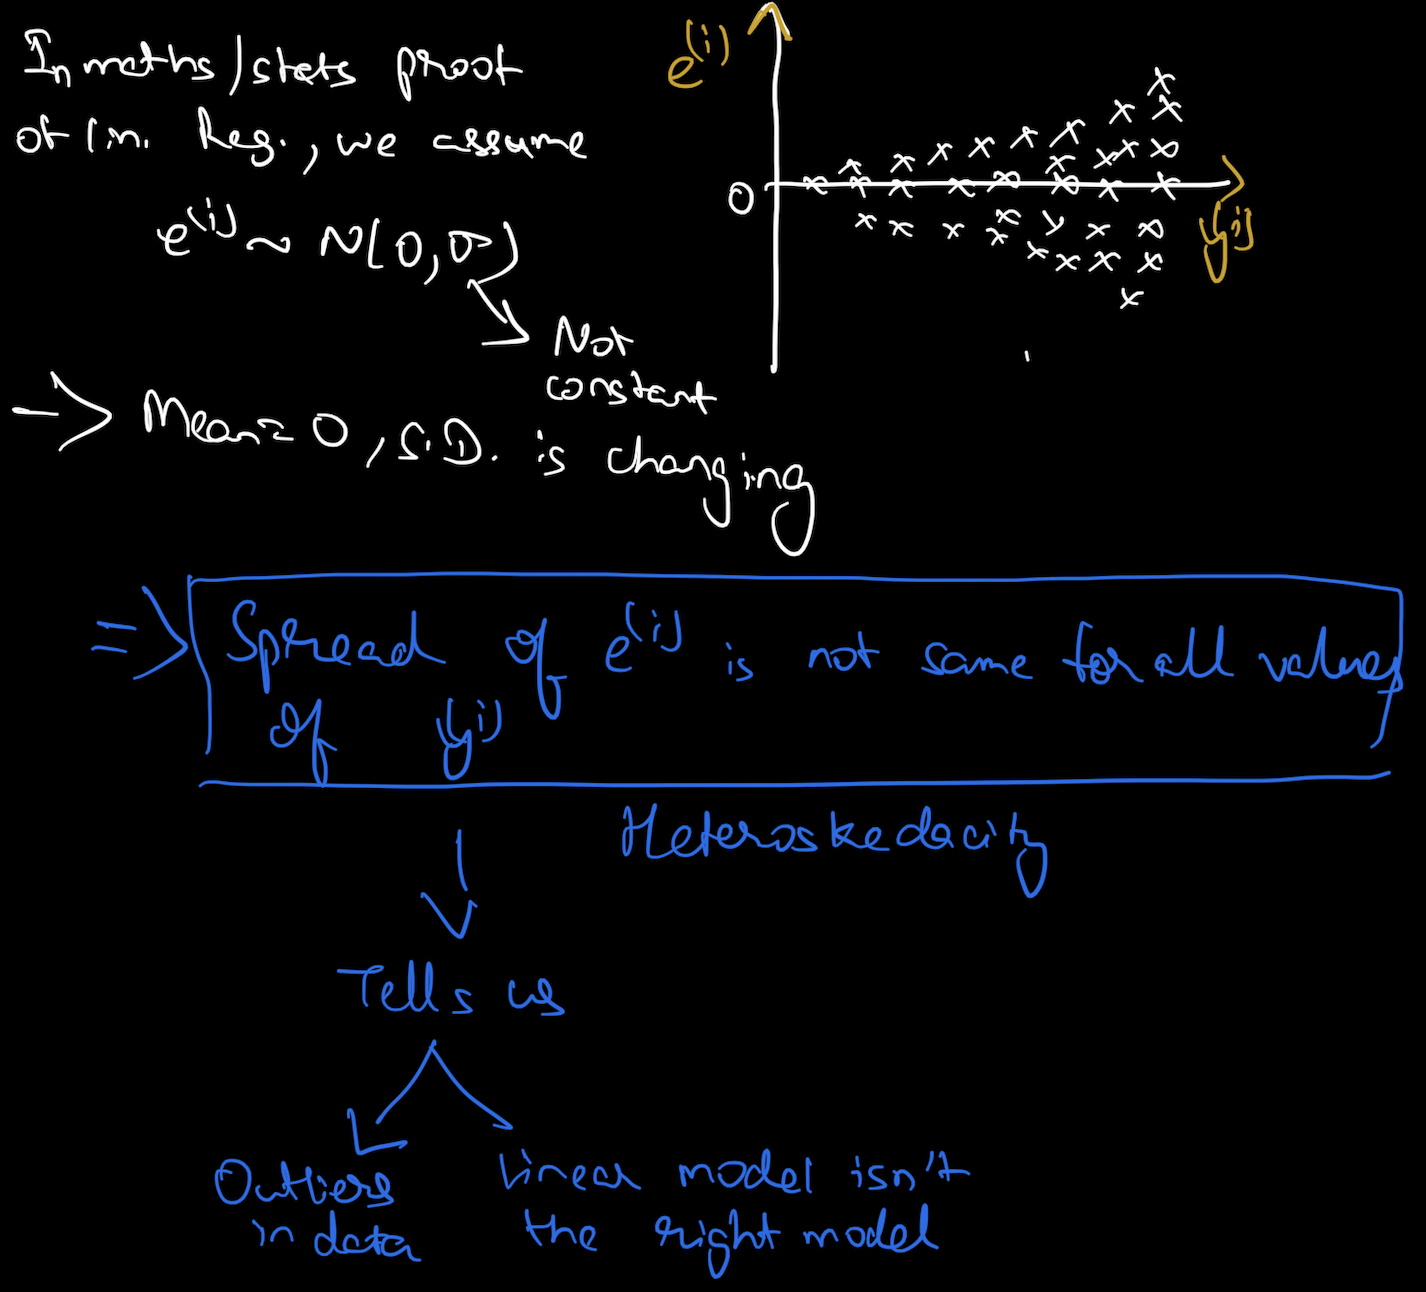

In the above plot though, the standard deviation is changing w.r.t $y^{(i)}$
- Spread of $e^{(i)}$ is not same for all values of $y^{(i)}$: Heteroskedacity

This tells us:
- Their are outliers present in the data \
or
- Linear regression isn't the right way to approach this problem

**Quiz** (Check your understanding)

```
Q: Which diagnostic plot can be used to detect heteroscedasticity?
a) Scatterplot of residuals against predicted values.
b) Histogram of residuals.
c) Normal probability plot of residuals.
d) Box plot of residuals.

Ans: a) Scatterplot of residuals against predicted values.
```

Lets implement heteroskedasticity in Cars24

In [ ]:
Y_hat = sm_model.predict(X2_sm)
errors = Y_hat - Y

Text(0.5, 1.0, 'Predicted values vs Residuals')

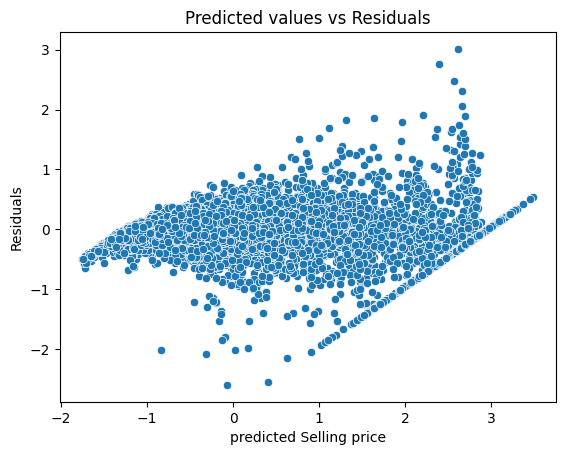

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

- Notice that As we go from left to right, errors are increasing.

#### What can we understand from this increasing Residuals?
- heteroskedasticity exists in our data
- There are outliers present in the dataset

# 5. No Autocorrelation

Autocorrelation plays a role only when time series is involved



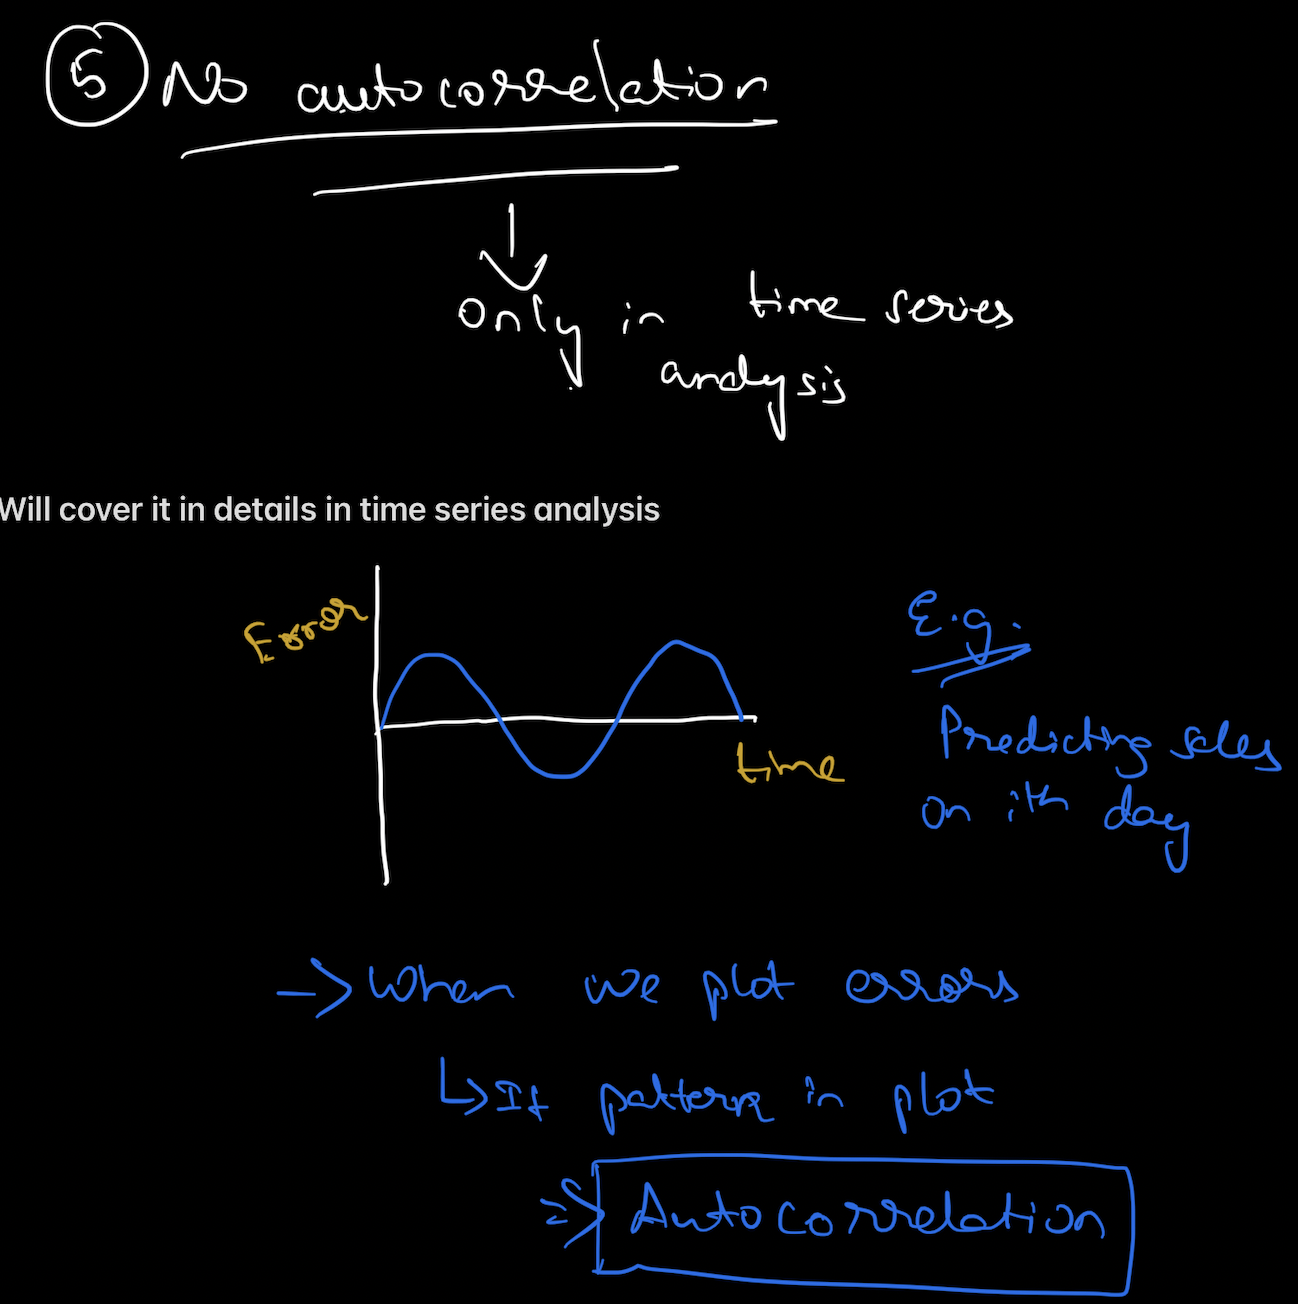

Let's say we are trying to predict the sales on ith day

- On plotting errors w.r.t. time, if there is a pattern in the plot, we say there is autocorrelation.
- This is only related to time series data, and we will discuss this in detail when we cover time series analysis

#### Summing up

- Summing up the Assumptions:
  - There exist a linear function
  - There is no auto correlation (related to time series)
  - Errors are normally distributed
  - No heteroskedasticity
  - No multicollinearity

We also have a fundamental assumption: $x^{(i)}, y^{(i)}$ are a random sample

**Quiz** (Revision)
```
In linear regression, a high VIF value suggests:
A) Heteroskedasticity is present
B) A strong linear relationship between the independent and dependent variables.
C) The absence of outliers in the dataset.
D) Strong multicollinearity between predictor variables.
```

**correct Answer**
D) Strong multicollinearity between predictor variables.